In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#Main

In [ ]:
from collections import defaultdict
from math import ceil
from time import time

class Node:
  def __init__(self, *args, **kwargs):
    self.pattern = kwargs['pattern']
    self.frequency = kwargs['frequency']
    self.parent = kwargs['parent']
    self.children = []

  def __str__(self):
    self.show()
    return ''

  def show(self):
    if self.pattern:
      print(self.pattern, end='')
      print(' : ', end='')
      print(self.frequency)
    else:
      print('root')

    if self.children:
      for child in self.children[:-1]:
        self.__elegant_print(child, '', '├──')

      self.__elegant_print(self.children[-1], '', '└──')



  def __elegant_print(self, node, prefix, symbol):
    print(prefix + symbol + ' ', end='')
    print(node.pattern, end='')
    print(" : ", end='')
    print(node.frequency)

    if node.children:
      for child in node.children[:-1]:
        self.__elegant_print(child, prefix + "│\t" if symbol == '├──' else prefix + ' \t', '├──')

      self.__elegant_print(node.children[-1], prefix + "│\t" if symbol == '├──' else prefix + ' \t', '└──')

  def add_children(self, child):
    self.children.append(child)


class FPgrowth:
  def __init__(self, *args, **kwargs):
    self.path = kwargs['path']
    self.root = Node(pattern=(), frequency=None, parent=None)
    self.header, self.order, self.total = self.__header_table()
    self.__build_tree()

  def print(self):
    self.root.show()

  def __custom_sort_key(self, item):
    if item in self.order:
        return self.order.index(item)
    else:
        return len(self.order)


  def __header_table(self):
    temp = defaultdict(int)
    count = 0
    with open(self.path, 'r') as f:
      for line in f:
        count += 1
        transactions = sorted(line.split())
        for i in transactions:
          temp[i] += 1

    return dict(sorted(temp.items(), key=lambda x:x[1],reverse = True)[::-1]), [i[0] for i in sorted(temp.items(), key=lambda x:x[1], reverse=True)], count


  def __build_tree(self):
    # print('Transactions:')
    with open(self.path, 'r') as f:
      for line in f:
        # print(line, end='')
        current = self.root

        for i in sorted(line.split(), key=self.__custom_sort_key):
          found = False

          for child in current.children:
            if child.pattern == i:
              child.frequency += 1
              current = child
              found = True
              break

          if not found:
            temp = Node(pattern=i, frequency=1, parent=current)
            current.add_children(temp)
            current = temp

    return self.root


  def mine(self, *args, **kwargs):
    self.frequent_patterns = defaultdict(int)
    self.threshold = ceil(self.total*kwargs['threshold'])
    print(f"total transactions {self.total}")
    print(f"threshold {self.threshold}")

    start = time()
    self.__get_frequent_patterns(self.header, self.root)
    end = time()

    print()
    print(f"completed in {end-start} secs")

  def __get_frequent_patterns(self, header, tree):
    for item in header:
      if header[item] >= self.threshold:
        self.frequent_patterns[tree.pattern + (item,)] = header[item]
        # print(item)

        cond_transactions = self.__get_conditional_transactions(tree, item)
        # print(cond_transactions)
        if cond_transactions:
          # cond_header = self.__get_conditional_header(cond_transactions)
          # print(cond_header)
          cond_header, cond_tree = self.__get_conditional_tree(cond_transactions, Node(pattern=tree.pattern+(item,), frequency=header[item], parent=None))
          # cond_tree.show()
          print(cond_header)
          self.__get_frequent_patterns(cond_header, cond_tree)
      # print()

  def __get_conditional_transactions(self, tree, item):
    queue = [tree]
    path_list = []

    while queue:
      current = queue.pop(0)
      for child in current.children:
        if child.pattern == item:
          path = self.__get_path(current,[])
          if path:
            for i in range(child.frequency):
              path_list.append(path)
        else:
          queue.append(child)

    return path_list

  def __get_path(self, tree, path):
    if not tree.parent:
      return path

    path.append(tree.pattern)
    return self.__get_path(tree.parent, path)


  def __get_conditional_header(self, transactions):
    temp = defaultdict(int)
    for line in transactions:
      for i in line:
        temp[i] += 1

    return dict(sorted(temp.items(), key=lambda x:x[1],reverse = True)[::-1])


  def __get_conditional_tree(self, transactions, root):
    temp_header = defaultdict(int)
    for line in transactions:
      current = root
      # print(line)
      for i in sorted(line, key=self.__custom_sort_key):
        # print(type(i))
        temp_header[i] += 1
        found = False

        for child in current.children:
          if child.pattern == i:
            child.frequency += 1
            current = child
            found = True
            break

        if not found:
          temp = Node(pattern=i, frequency=1, parent=current)
          current.add_children(temp)
          current = temp

    return dict(sorted(temp_header.items(), key=lambda x:x[1],reverse = True)[::-1]), root

  def count_frequent_pattern(self):
    print()
    print(f"lengthwise frequent pattern count for threshold {self.threshold}")
    sorted_patterns = defaultdict(list)
    for pattern in self.frequent_patterns:
      sorted_patterns[len(pattern)].append((tuple(sorted(pattern)), self.frequent_patterns[pattern]))

    for i in sorted(sorted_patterns):
      print(f"length {i} : {len(sorted_patterns[i])}")


  def show_frequent_patterns(self, *args, **kwargs):
    sorted_patterns = defaultdict(list)
    for pattern in self.frequent_patterns:
      sorted_patterns[len(pattern)].append((tuple(sorted(pattern)), self.frequent_patterns[pattern]))

    if not args:
      for i in sorted_patterns:
        sorted_patterns[i].sort()
        for pattern, frequency in sorted_patterns[i]:
          print(pattern, end=' : ')
          print(frequency)
    else:
      for i in args:
        for pattern, frequency in sorted_patterns[i]:
          print(pattern, end=' : ')
          print(frequency)

##chess

In [ ]:
chess = FPgrowth(path='/content/drive/MyDrive/cse477/chess.dat.txt')

In [ ]:
chess.mine(threshold=0.9)
chess.count_frequent_pattern()

total transactions 3196
threshold 2877

completed in 1.6963958740234375 secs

lengthwise frequent pattern count for threshold 2877
length 1 : 13
length 2 : 68
length 3 : 167
length 4 : 203
length 5 : 128
length 6 : 39
length 7 : 4


In [ ]:
chess.mine(threshold=0.8)
chess.count_frequent_pattern()

total transactions 3196
threshold 2557

completed in 22.06865382194519 secs

lengthwise frequent pattern count for threshold 2557
length 1 : 19
length 2 : 141
length 3 : 566
length 4 : 1383
length 5 : 2130
length 6 : 2104
length 7 : 1314
length 8 : 481
length 9 : 85
length 10 : 4


In [ ]:
chess.mine(threshold=0.7)
chess.count_frequent_pattern()

total transactions 3196
threshold 2238

completed in 112.72999906539917 secs

lengthwise frequent pattern count for threshold 2238
length 1 : 24
length 2 : 238
length 3 : 1237
length 4 : 3857
length 5 : 7891
length 6 : 11125
length 7 : 11113
length 8 : 7916
length 9 : 3895
length 10 : 1216
length 11 : 204
length 12 : 14
length 13 : 1


In [ ]:
chess.mine(threshold=0.6)
chess.count_frequent_pattern()

total transactions 3196
threshold 1918

completed in 507.0605103969574 secs

lengthwise frequent pattern count for threshold 1918
length 1 : 34
length 2 : 389
length 3 : 2325
length 4 : 8831
length 5 : 23155
length 6 : 43106
length 7 : 57479
length 8 : 55062
length 9 : 37876
length 10 : 18607
length 11 : 6419
length 12 : 1466
length 13 : 187
length 14 : 8


###plot

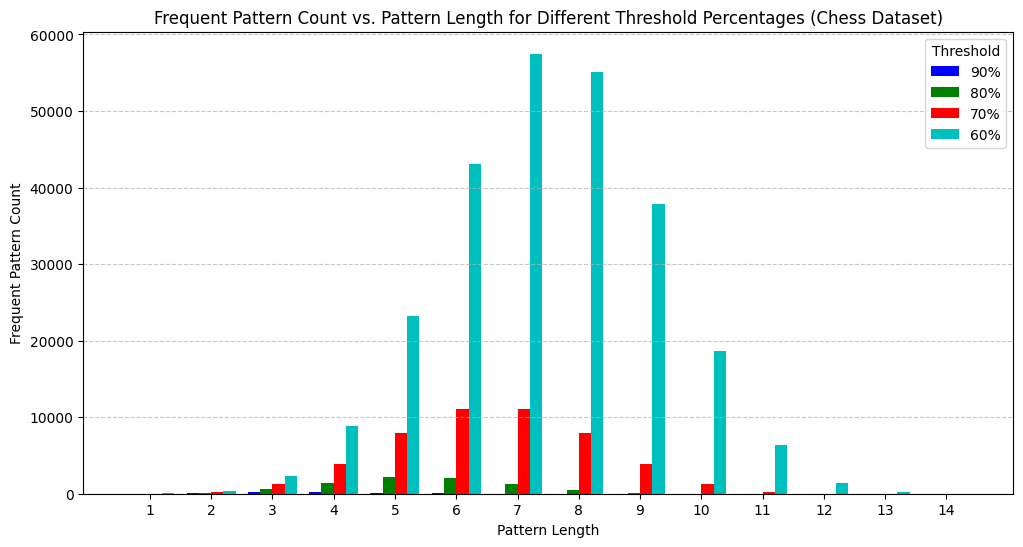

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for frequent pattern counts at different threshold percentages
thresholds = [90, 80, 70, 60]
max_length = 14  # Maximum pattern length
lengths = list(range(1, max_length + 1))

frequent_pattern_counts = {
    90: [13, 68, 167, 203, 128, 39, 4],
    80: [19, 141, 566, 1383, 2130, 2104, 1314, 481, 85, 4],
    70: [24, 238, 1237, 3857, 7891, 11125, 11113, 7916, 3895, 1216, 204, 14, 1],
    60: [34, 389, 2325, 8831, 23155, 43106, 57479, 55062, 37876, 18607, 6419, 1466, 187, 8]
}

# Fill up the lists with zeros to match the maximum length
for threshold in thresholds:
    while len(frequent_pattern_counts[threshold]) < max_length:
        frequent_pattern_counts[threshold].append(0)

# Create a bar plot
bar_width = 0.2
index = np.arange(max_length)
colors = ['b', 'g', 'r', 'c']

plt.figure(figsize=(12, 6))

for i, threshold in enumerate(thresholds):
    plt.bar(index + i * bar_width, frequent_pattern_counts[threshold], bar_width, label=f"{threshold}%", color=colors[i])

plt.xlabel("Pattern Length")
plt.ylabel("Frequent Pattern Count")
plt.title("Frequent Pattern Count vs. Pattern Length for Different Threshold Percentages (Chess Dataset)")
plt.xticks(index + bar_width * (len(thresholds) - 1) / 2, lengths)
plt.legend(title="Threshold")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

##mushroom

In [ ]:
mushroom = FPgrowth(path='/content/drive/MyDrive/cse477/mushroom.dat')

In [ ]:
mushroom.mine(threshold=0.9)
mushroom.count_frequent_pattern()

total transactions 8124
threshold 7312

completed in 0.05096316337585449 secs

lengthwise frequent pattern count for threshold 7312
length 1 : 4
length 2 : 4
length 3 : 1


In [ ]:
mushroom.mine(threshold=0.8)
mushroom.count_frequent_pattern()

total transactions 8124
threshold 6500

completed in 0.13865876197814941 secs

lengthwise frequent pattern count for threshold 6500
length 1 : 5
length 2 : 9
length 3 : 7
length 4 : 2


In [ ]:
mushroom.mine(threshold=0.7)
mushroom.count_frequent_pattern()

total transactions 8124
threshold 5687

completed in 0.16063976287841797 secs

lengthwise frequent pattern count for threshold 5687
length 1 : 5
length 2 : 10
length 3 : 10
length 4 : 5
length 5 : 1


In [ ]:
mushroom.mine(threshold=0.6)
mushroom.count_frequent_pattern()

total transactions 8124
threshold 4875

completed in 0.29703569412231445 secs

lengthwise frequent pattern count for threshold 4875
length 1 : 8
length 2 : 18
length 3 : 17
length 4 : 7
length 5 : 1


###plot

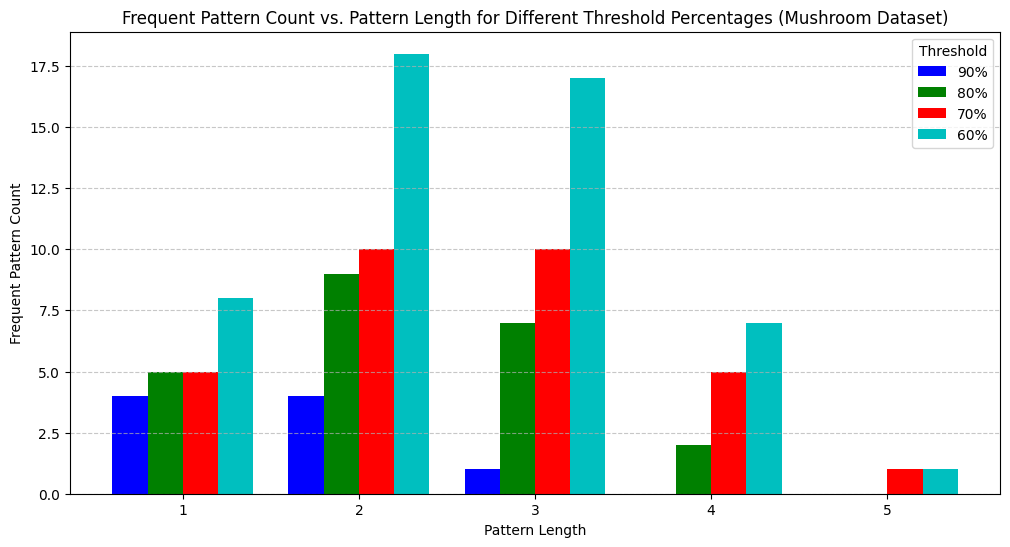

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for frequent pattern counts at different threshold percentages
thresholds = [90, 80, 70, 60]
max_length = 5  # Maximum pattern length
lengths = list(range(1, max_length + 1))

frequent_pattern_counts = {
    90: [4, 4, 1, 0, 0],  # Fill with zeros for missing lengths
    80: [5, 9, 7, 2, 0],  # Fill with zeros for missing lengths
    70: [5, 10, 10, 5, 1],
    60: [8, 18, 17, 7, 1]
}

# Fill up the lists with zeros to match the maximum length
for threshold in thresholds:
    while len(frequent_pattern_counts[threshold]) < max_length:
        frequent_pattern_counts[threshold].append(0)

# Create a bar plot
bar_width = 0.2
index = np.arange(max_length)
colors = ['b', 'g', 'r', 'c']

plt.figure(figsize=(12, 6))

for i, threshold in enumerate(thresholds):
    plt.bar(index + i * bar_width, frequent_pattern_counts[threshold], bar_width, label=f"{threshold}%", color=colors[i])

plt.xlabel("Pattern Length")
plt.ylabel("Frequent Pattern Count")
plt.title("Frequent Pattern Count vs. Pattern Length for Different Threshold Percentages (Mushroom Dataset)")
plt.xticks(index + bar_width * (len(thresholds) - 1) / 2, lengths)
plt.legend(title="Threshold")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
